In [3]:
!pip install qiskit
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 95.1 MB/s eta 0:00:00


Random Bits: [1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
As Integer: 33516
As Hex: 0x82ec


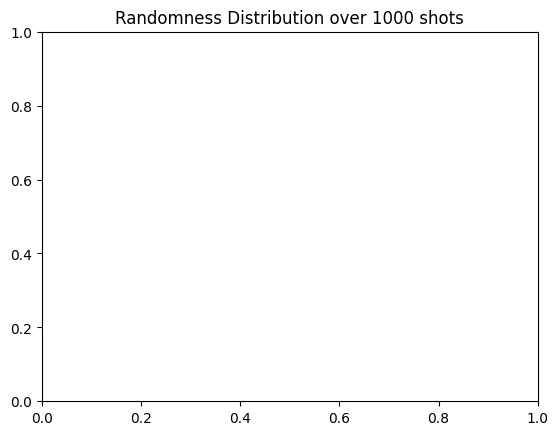

In [5]:
#Qiskit RNG

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, QasmSimulator # Import QasmSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create a reusable quantum circuit with Hadamard + measurement
def create_rng_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)               # Apply Hadamard to qubit 0 to create superposition
    qc.measure(0, 0)      # Measure qubit into classical bit 0
    return qc

# Step 2: Generate a random bit
def generate_random_bit():
    qc = create_rng_circuit()
    simulator = QasmSimulator()
    job = simulator.run(qc, shots=1) # Use simulator.run()
    result = job.result()
    counts = result.get_counts()
    return int(list(counts.keys())[0])

# Step 3: Generate multiple random bits

def generate_random_bits(n):
    return [generate_random_bit() for _ in range(n)]

# Step 4: Generate histogram of randomness (for testing)
def visualize_rng_distribution(shots=1000):
    qc = create_rng_circuit()
    simulator = QasmSimulator()
    job = simulator.run(qc, shots=shots) # Use simulator.run()
    result = job.result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.title(f"Randomness Distribution over {shots} shots")
    plt.show()

# RNG Service-style Example
if __name__ == '__main__':
    num_bits = 16
    bits = generate_random_bits(num_bits)
    print("Random Bits:", bits)
    print("As Integer:", int("".join(map(str, bits)), 2))
    print("As Hex:", hex(int("".join(map(str, bits)), 2)))

    # Optional: visualize randomness over many runs
    visualize_rng_distribution()